Creator: Krishita Laungani

This mini-software allows the user to compare Air Fare from the Airport they want to travel from. They are able to compare prices based on Airline Company, Type of Seat, and the Destination Airport. This can allow the user to compare prices to see which destination or company best fits their budget. After analyzing the data, the user can also input the number of days they are traveling and their budget to see which destination would be the most cost-effective for them.


---
dataset: https://www.kaggle.com/datasets/dilwong/flightprices cleaning done on excel

dataset for daily cost of living taken from part of: https://ballotpedia.org/Analysis_of_spending_in_America%27s_largest_cities

In [1]:
from google.colab import files
uploaded = files.upload()

Saving daytravelcost.csv to daytravelcost.csv
Saving flight_details.csv to flight_details.csv


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [14]:
df1 = pd.read_csv(io.BytesIO(uploaded['daytravelcost.csv']))
#print(df1.head())
#%load_ext sql
%sql sqlite://
#%sql --persist df1
print('Disclaimer: JFK, LGA, and EWR do not fly to each other within this context')
%sql SELECT city, airport_code FROM df1


Disclaimer: JFK, LGA, and EWR do not fly to each other within this context
 * sqlite:///:memory:
Done.


city,airport_code
Atlanta,ATL
Boston,BOS
Chicago,ORD
Dallas,DFW
Denver,DEN
Detroit,DTW
Los Angeles,LAX
Miami,MIA
New York,JFK
Newark,EWR


In [15]:
df2 = pd.read_csv(io.BytesIO(uploaded['flight_details.csv']))
df2 = df2.rename(columns={'segmentsAirlineName': 'Airline', 'segmentsCabinCode': 'SeatType'})
df2['Airline'] = df2['Airline'].str.strip().str.lower().replace('[^a-zA-Z0-9]', '_', regex=True)
df2['SeatType'] = df2['SeatType'].str.strip().str.lower().replace('[^a-zA-Z0-9]', '_', regex=True)

In [18]:
#%sql --persist df2
%sql SELECT DISTINCT Airline FROM df2

 * sqlite:///:memory:
Done.


Airline
delta
jetblue_airways
american_airlines
frontier_airlines
united
spirit_airlines
alaska_airlines


In [19]:
%sql SELECT DISTINCT SeatType FROM df2

 * sqlite:///:memory:
Done.


SeatType
coach
first
premium_coach
business


Welcome to the Flight Fare Information Visualization Software!
You can compare average airFare based on the following variables:
- destinationAirport
- Airline
- SeatType
Variables have to be inputted exactly, and the filter options are shown above; the airport codes, Airline, and SeatType 
Enter the airport you want to fly from: ORD
Enter the variable to compare:Airline
Enter the filter variable (press Enter if none): destinationAirport
Enter the filter value for destinationAirport (press Enter for all): 


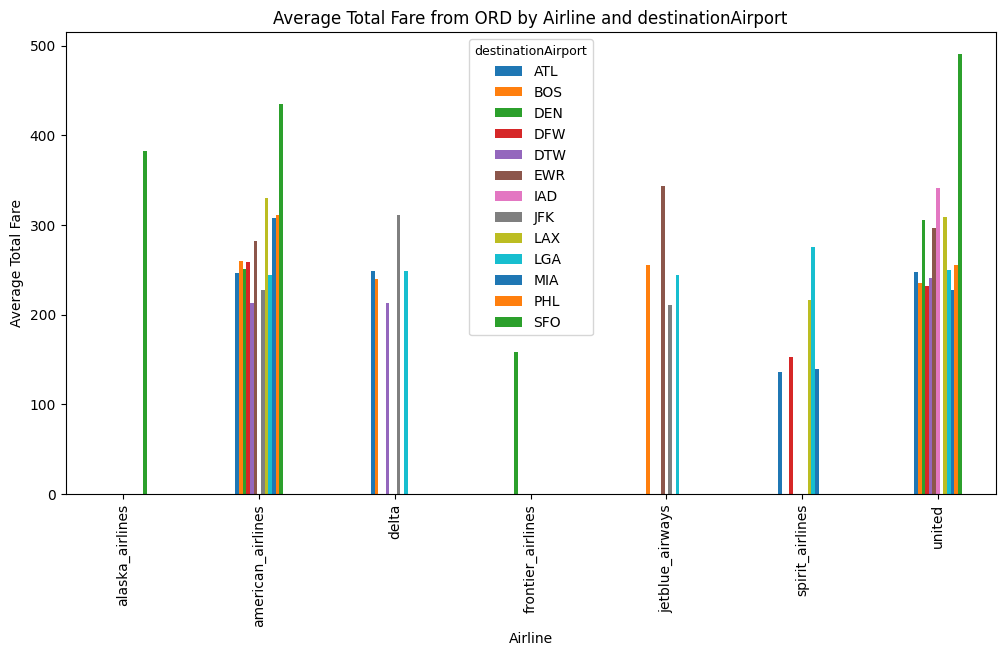

In [43]:
print("Welcome to the Flight Fare Information Visualization Software!")
print("You can compare average airFare based on the following variables:")
print("- destinationAirport")
print("- Airline")
print("- SeatType")
print("Variables have to be inputted exactly, and the filter options are shown above; the airport codes, Airline, and SeatType ")

# User inputs
origin_airport = input("Enter the airport you want to fly from: ")
comparison_variable = input("Enter the variable to compare:")

# If user want to filter by any value
filter_variable = input("Enter the filter variable (press Enter if none): ")
if filter_variable:
    filter_value = input(f"Enter the filter value for {filter_variable} (press Enter for all): ")
else:
    filter_value = 'All'

# Map user input for filter_variable to the actual column name
column_name_mapping = {
    'destinationAirport': 'destinationAirport',
    'Airline': 'Airline',
    'SeatType': 'SeatType'
}

filter_variable_column = column_name_mapping.get(filter_variable, None) if filter_variable else None

# Filter data based on user input
filtered_data = df2[df2['startingAirport'] == origin_airport]

if filter_variable_column is not None and filter_value != 'All':
    # Check if filter_value is not empty before applying the filtering condition
    if filter_value:
        filtered_data = filtered_data[filtered_data[filter_variable_column] == filter_value]

# Compare
comparison_data = filtered_data.groupby(comparison_variable)['totalFare'].mean().reset_index()

#Visualize
if filter_variable_column is not None:
    grouped_data = filtered_data.groupby([comparison_variable, filter_variable_column])['totalFare'].mean().unstack()
    grouped_data.plot(kind='bar', width=0.35, figsize=(12, 6))
    plt.xlabel(comparison_variable)
    plt.ylabel('Average Total Fare')
    plt.title(f'Average Total Fare from {origin_airport} by {comparison_variable} and {filter_variable}')
    plt.legend(title=filter_variable_column, title_fontsize='9')
else:
    comparison_data.plot(kind='bar', x=comparison_variable, y='totalFare', figsize=(5, 3))
    plt.xlabel(comparison_variable)
    plt.ylabel('Average Total Fare')
    plt.title(f'Average Total Fare from {origin_airport} by {comparison_variable}')

plt.show()

In [42]:
#Filtering for most basic option -- coach
df2 = df2[df2['SeatType'] == 'coach']

# User Input
origin_airport = input("Enter your origin airport: ")
travel_days = int(input("Enter the number of days you are traveling: "))
total_budget = float(input("Enter your total travel budget minus accommodations and activities: "))

daily_cost = df1[df1['airport_code'] == origin_airport]['daily_cost'].values[0]


# Average flight cost for each destination
average_flight_cost = df2.groupby('startingAirport')['totalFare'].mean().to_dict()

# Total travel cost for each destination
df1['average_flight_cost'] = df1['airport_code'].map(average_flight_cost)
df1['total_travel_cost'] = df1['daily_cost'] * travel_days + df1['average_flight_cost']

filtered_destinations = df1[df1['total_travel_cost'] <= total_budget]


# Recommendation
top_destinations = filtered_destinations.sort_values(by='total_travel_cost').head(5)

print("\nTop 5 Destinations within Budget:")
for index, row in top_destinations.iterrows():
    print(f"{row['city']}, {row['airport_code']} -")
    print(f"  Total Food, Travel, and Miscellaneous cost for {travel_days} days: ${row['daily_cost'] * travel_days:.2f}")
    print(f"  Average Flight Cost for a Coach Seat: ${row['average_flight_cost']:.2f}")
    print(f"  Total Cost: ${row['total_travel_cost']:.2f}")
    print("-" * 30)

Enter your origin airport: LAX
Enter the number of days you are traveling: 5
Enter your total travel budget minus accommodations and activities: 700

Top 5 Destinations within Budget:
Atlanta, ATL -
  Total Food, Travel, and Miscellaneous cost for 5 days: $200.00
  Average Flight Cost for a Coach Seat: $272.34
  Total Cost: $472.34
------------------------------
Miami, MIA -
  Total Food, Travel, and Miscellaneous cost for 5 days: $210.00
  Average Flight Cost for a Coach Seat: $268.67
  Total Cost: $478.67
------------------------------
Denver, DEN -
  Total Food, Travel, and Miscellaneous cost for 5 days: $380.00
  Average Flight Cost for a Coach Seat: $270.99
  Total Cost: $650.99
------------------------------
Dallas, DFW -
  Total Food, Travel, and Miscellaneous cost for 5 days: $390.00
  Average Flight Cost for a Coach Seat: $280.11
  Total Cost: $670.11
------------------------------
